In [17]:
import pandas as pd
#https://www.data.gouv.fr/datasets/demandes-de-valeurs-foncieres/#/resources/d573456c-76eb-4276-b91c-e6b9c89d6656
df = pd.read_csv("./ValeursFoncieres-2025-S1.txt", sep='|', on_bad_lines='skip')

/tmp/ipykernel_384524/3949807661.py:3: DtypeWarning: Columns (18,23,24,26,28,29,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./ValeursFoncieres-2025-S1.txt", sep='|', on_bad_lines='skip')


In [18]:
#data overview
df.head()
#list(df.columns)
print(df['Code departement'].value_counts())
#df.describe()
#df['Section'].describe()

Code departement
59     40578
6      37407
33     36297
13     34113
83     31675
       ...  
48      3539
90      2203
973     2191
972     1598
971     1267
Name: count, Length: 99, dtype: int64


In [19]:
#filter the lines of interest
df = df[(
            (df['Type local'] == 'Appartement')
            #& (df['Commune'] == 'NICE')
            & (df['Nature mutation'] == 'Vente')
            #& (df['Code departement'] != '2A')
            #& (df['Code departement'] != '2B')
        )]
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2025,Vente,...,NaN,0,2.0,Appartement,NaN,87.0,4.0,S,NaN,76.0
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,09/01/2025,Vente,...,NaN,1,2.0,Appartement,NaN,35.0,2.0,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2025,Vente,...,NaN,1,2.0,Appartement,NaN,49.0,2.0,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,09/01/2025,Vente,...,NaN,1,2.0,Appartement,NaN,78.0,3.0,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2025,Vente,...,NaN,2,2.0,Appartement,NaN,67.0,3.0,NaN,NaN,NaN


In [ ]:
#drop the columns not used
exclusions = [
        'Identifiant de document',
        'Reference document',
        '1 Articles CGI',
        '2 Articles CGI',
        '3 Articles CGI',
        '4 Articles CGI',
        '5 Articles CGI',
        'No disposition',
        'Date mutation',
        'Nature mutation',
        #'Valeur fonciere',
        'No voie',
        'B/T/Q',
        'Type de voie',
        'Code voie',
        'Voie',
        'Code postal',
        #'Commune',
        #'Code departement',
        'Code commune',
        'Prefixe de section',
        #'Section',
        'No plan',
        'No Volume',
        '1er lot',
        'Surface Carrez du 1er lot',
        '2eme lot',
        'Surface Carrez du 2eme lot',
        '3eme lot',
        'Surface Carrez du 3eme lot',
        '4eme lot',
        'Surface Carrez du 4eme lot',
        '5eme lot',
        'Surface Carrez du 5eme lot',
        #'Nombre de lots',
        'Code type local',
        'Type local',
        'Identifiant local',
        #'Surface reelle bati',
        #'Nombre pieces principales',
        'Nature culture',
        'Nature culture speciale',
        'Surface terrain'
]
df = df.drop(columns=exclusions)
df.head()

,Valeur fonciere,Commune,Code departement,Section,Nombre de lots,Surface reelle bati,Nombre pieces principales
5,"180000,00",MONTANGES,1,AC,0,87.0,4.0
20,"183000,00",GEX,1,AH,1,35.0,2.0
27,"131937,30",AMBERIEUX-EN-DOMBES,1,AC,1,49.0,2.0
29,"173000,00",PONT-DE-VEYLE,1,A,1,78.0,3.0
50,"414665,00",CHALLEX,1,B,2,67.0,3.0


In [21]:
#remove the lines having NaN
df.dropna(inplace=True)
df.head()

,Valeur fonciere,Commune,Code departement,Section,Nombre de lots,Surface reelle bati,Nombre pieces principales
5,"180000,00",MONTANGES,1,AC,0,87.0,4.0
20,"183000,00",GEX,1,AH,1,35.0,2.0
27,"131937,30",AMBERIEUX-EN-DOMBES,1,AC,1,49.0,2.0
29,"173000,00",PONT-DE-VEYLE,1,A,1,78.0,3.0
50,"414665,00",CHALLEX,1,B,2,67.0,3.0


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [23]:
#frequency based embedding (vs prediction based embedding)

#count vector encoding
#large vocabulary > large features vectors
#undordered, loss semantic
#mitigation: can filter on top N/ hashing for bucketing
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(df_encoded['Commune'])

#TD-IDF
#vectorizer = TfidfVectorizer()
df['Section'] = df['Section'].astype('category')
#df['Date mutation'] = pd.to_datetime(df['Date mutation'],format='%m/%d/%Y', errors='coerce')
#df['Date mutation']=df['Date mutation'].astype(int) #unix timestamp
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.').astype(float)
#df['Surface Carrez du 1er lot'] = df['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)
df['Code departement'] = df['Code departement'].replace({'2A': 2001, '2B': 2002})
df['Code departement'] = df['Code departement'].astype(int)

In [24]:
#dataset sanity checks
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [Valeur fonciere, Commune, Code departement, Section, Nombre de lots, Surface reelle bati, Nombre pieces principales]
Index: []


In [25]:
#dataset sanity checks
print(df.select_dtypes(include='object'))
#print(df.select_dtypes(include='object').columns)

                     Commune
5                  MONTANGES
20                       GEX
27       AMBERIEUX-EN-DOMBES
29             PONT-DE-VEYLE
50                   CHALLEX
...                      ...
1387061             PARIS 11
1387063             PARIS 12
1387064             PARIS 16
1387072             PARIS 13
1387073             PARIS 05

[182980 rows x 1 columns]


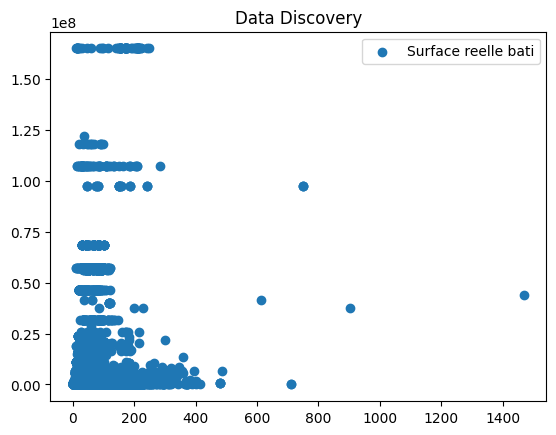

In [26]:
import matplotlib.pyplot as plt
plt.scatter(df['Surface reelle bati'], df['Valeur fonciere'], label='Surface reelle bati')
#plt.scatter(df['Code departement'], df['Valeur fonciere'], label='Code departement')
#plt.scatter(df['Commune'], df['Valeur fonciere'], label='Commune')
plt.title('Data Discovery')
plt.legend()
plt.show()

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf1', TfidfVectorizer(), 'Commune'),
        ('onehot1', OneHotEncoder(sparse_output=False, dtype=int), ['Section']),
    ],
    remainder='passthrough'  # Keep all other columns
)

df_x = df.drop(['Valeur fonciere'], axis=1)

X = preprocessor.fit_transform(df_x)
predictors = preprocessor.get_feature_names_out()
print(predictors)

Y=df['Valeur fonciere']

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

['tfidf1__01' 'tfidf1__02' 'tfidf1__03' ... 'remainder__Nombre de lots'
 'remainder__Surface reelle bati' 'remainder__Nombre pieces principales']


In [28]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
linear_model.score(X_train, Y_train)

0.6468878397157738

In [29]:
linear_model.coef_
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

tfidf1__semur         -6.210742e+06
tfidf1__grand         -5.325620e+06
onehot1__Section_KE   -5.109859e+06
tfidf1__petit         -5.038438e+06
tfidf1__combs         -4.792281e+06
                           ...     
tfidf1__pessac         1.905987e+07
tfidf1__chauray        2.098069e+07
tfidf1__maixent        2.410244e+07
tfidf1__07             2.487054e+07
tfidf1__sec            7.567862e+07
Length: 7421, dtype: float64


In [30]:
y_predict=linear_model.predict(x_test)

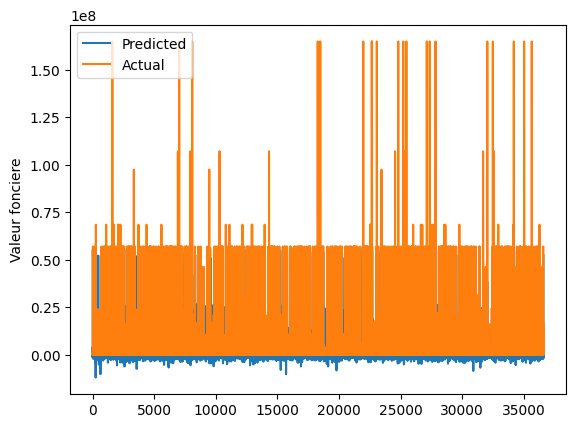

In [31]:
plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Valeur fonciere')

plt.legend()
plt.show()

In [32]:
r_square = linear_model.score(x_test, y_test)
r_square

0.6435701532674925